In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

In [21]:
df = pd.read_csv('distances.csv')
df

,group,seed,finish1,finish2
0,A,1,5349.941332,4387.617652
1,A,2,3449.945690,3449.945690
2,A,3,4277.375874,4277.375874
3,A,4,6152.766470,5190.442790
4,B,1,4284.786568,4213.424466
5,B,2,9093.492192,7628.845337
6,B,3,3571.359087,2106.712233
7,B,4,7620.839637,7549.477535
8,C,1,3662.046129,4672.222063
9,C,2,4599.084811,4880.403096


<AxesSubplot:xlabel='group'>

/home/agale/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


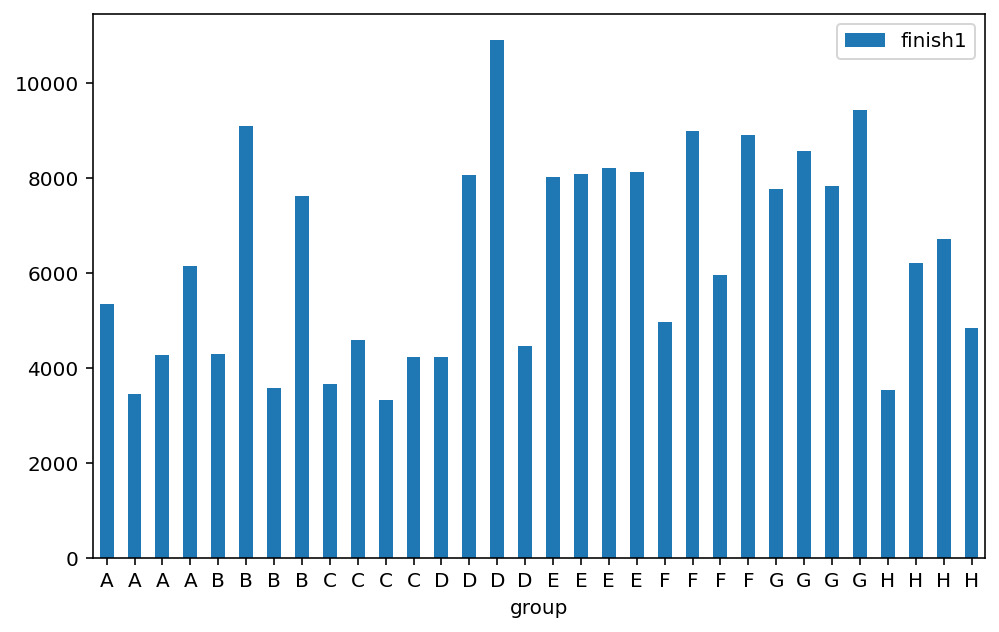

In [22]:
df.plot.bar(x='group', y='finish1', rot=0)

<Figure size 9600x6000 with 0 Axes>

/home/agale/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


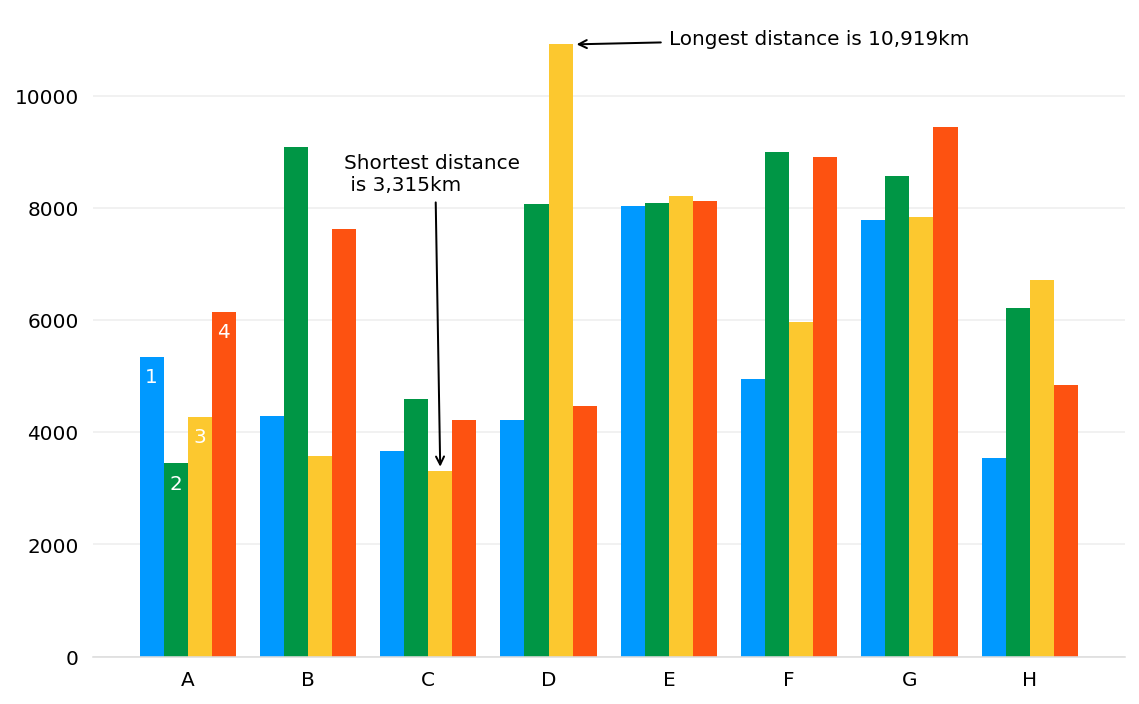

In [26]:
width = 0.20
x = np.arange(len(df.group.unique()))

plt.rcParams['figure.figsize'] = (8, 5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

bar1 = ax.bar(x-0.3, df[df['seed'] == 1]['finish1'], width, color='#0099FF')
bar2 = ax.bar(x-0.1, df[df['seed'] == 2]['finish1'], width, color='#009645')
bar3 = ax.bar(x+0.1, df[df['seed'] == 3]['finish1'], width, color='#FCC82F')
bar4 = ax.bar(x+0.3, df[df['seed'] == 4]['finish1'], width, color='#FD5211')

def autolabel(rect, label):
    """Attach a text label above each bar in *rects*, displaying its height."""
    ax.annotate(label,
                xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                xytext=(0, -15),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', color='white')

autolabel(bar1[0], '1')
autolabel(bar2[0], '2')
autolabel(bar3[0], '3')
autolabel(bar4[0], '4')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.xticks(x, df.group.unique())

plt.annotate('Longest distance is 10,919km', xy=(bar3[3].get_x() + 0.2, bar3[3].get_height()),
             xytext=(bar3[3].get_x()+1, bar3[3].get_height()),
             arrowprops=dict( arrowstyle="->" ))
plt.annotate('Shortest distance \n is 3,315km', xy=(bar3[2].get_x() + 0.1, bar3[2].get_height()),
             xytext=(bar3[2].get_x()-0.7, bar3[2].get_height()+5000),
             arrowprops=dict( arrowstyle="->" ))

fig.tight_layout()
plt.show()

In [102]:
fig.savefig('distances.png', dpi=fig.dpi, facecolor='white', transparent=False)